In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
import statistics as sts
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.stats.api
import statsmodels.stats as sms
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.spatial.distance import cdist
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score)

In [2]:
df = pd.read_csv("/tf/git/Aulas estat nao param/trabalho mnist/mnist_train.csv")
df_2 = pd.read_csv("/tf/git/Aulas estat nao param/trabalho mnist/mnist_test.csv")
df = pd.concat([df,df_2])
df_2=0
df.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

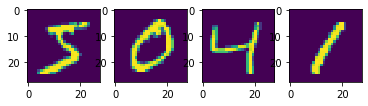

In [3]:
nums = []
for i in range(0,10):
    a = np.matrix(df.loc[: , ~df.columns.isin(["label"])].iloc[i])
    a.shape = (28,28)
    nums.append(a)

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,4) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(nums[0], interpolation='nearest')
axarr[1].imshow(nums[1], interpolation='nearest')
axarr[2].imshow(nums[2], interpolation='nearest')
axarr[3].imshow(nums[3], interpolation='nearest')


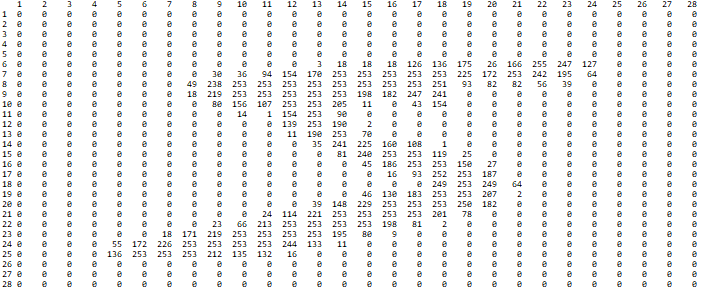

In [4]:
from IPython.display import Image
Image("print mnist.png")

In [5]:
cols_ignore = ['label',"qtd. zero","soma","media","desv. pad.","var.","erro da media"]
df["qtd. zero"] = df.loc[:, ~df.columns.isin(cols_ignore)].isin([0]).sum(1)
df["soma"] = df.loc[:, ~df.columns.isin(cols_ignore)].sum(axis = 1)
df["media"] = df.loc[:, ~df.columns.isin(cols_ignore)].mean(axis = 1)
df["desv. pad."] = df.loc[:, ~df.columns.isin(cols_ignore)].std(axis = 1)
df["var."] = df.loc[:, ~df.columns.isin(cols_ignore)].var(axis = 1)
df["erro da media"] = df.loc[:, ~df.columns.isin(cols_ignore)].sem(axis = 1)

df.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x25  28x26  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x27  28x28  qtd. zero   soma      media  desv. pad.         var.  \
0      0      0        618  27525  35.108418   79.699674  6352.038039   
1      0      0        608  31095  39.661990   83.940709  7046.042691   
2      0      0        664  19443  24.799745   65.621613  4306.196117   
3      0      0        688  17135  21.855867   66.121069  4371.995802   
4      0      0        642  23214  29.609694   74.418792  5538.156534   

   erro da media  
0       2.846417  
1       2.997882  
2       2.343629  
3       2.361467  
4       2.657814  

[5 rows x 791 columns]

In [6]:
df_t = df[cols_ignore]
df_t.head()

label  qtd. zero   soma      media  desv. pad.         var.  erro da media
0      5        618  27525  35.108418   79.699674  6352.038039       2.846417
1      0        608  31095  39.661990   83.940709  7046.042691       2.997882
2      4        664  19443  24.799745   65.621613  4306.196117       2.343629
3      1        688  17135  21.855867   66.121069  4371.995802       2.361467
4      9        642  23214  29.609694   74.418792  5538.156534       2.657814

In [7]:
px.box(df_t, color="label", y="qtd. zero")

In [8]:
px.box(df_t, color="label", y="soma")

In [ ]:
px.box(df_t, color="label", y="media")

In [ ]:
px.box(df_t, color="label", y="desv. pad.")

In [ ]:
px.box(df_t, color="label", y="var.")

In [ ]:
px.box(df_t, color="label", y="erro da media")

In [ ]:
fig = px.imshow(
    df_t.loc[:, ~df_t.columns.isin(["label"])].corr()
)

fig.show()

In [ ]:
fig = px.scatter(df_t, x='erro da media', y = "soma",
              color='label')
fig.show()

In [ ]:
fig = px.scatter(df_t, x='qtd. zero', y = "soma",
              color='label')
fig.show()

In [68]:
x_train, x_test, y_train, y_test = train_test_split(df_t.loc[:, ~df_t.columns.isin(["label"])], df_t["label"], test_size=0.2)

# KNN.
n_neighbors = 200

accuracy = []
precision = []
recall = []
f1 = []

inicio = time.time()
for k in range(1,n_neighbors+1):
    knn_clf = KNeighborsClassifier(k, n_jobs = 4)
    knn_clf.fit(x_train, y_train)
    
    y = knn_clf.predict(x_test)
    
    accuracy.append(accuracy_score(y_test, y))
    precision.append(precision_score(y_test, y, average=None))
    recall.append(recall_score(y_test, y, average=None))
    f1.append(f1_score(y_test, y, average=None))
fim = time.time()
print(fim - inicio)

123.8873381614685


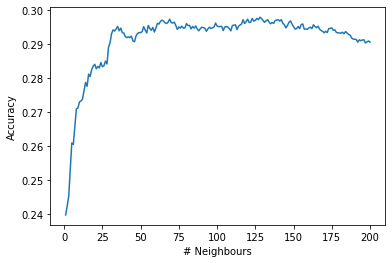

In [70]:
plt.figure()
plt.plot(range(1,n_neighbors+1), accuracy)
plt.xlabel('# Neighbours')
plt.ylabel('Accuracy')
plt.show()

In [73]:
conditions = [
    (df['label'] == 0),
    (df['label'] == 1)]
choices = [0, 1]

df_t['label2'] = np.select(conditions, choices, default='outro')
print(df_t)

      label  qtd. zero   soma      media  desv. pad.         var.  \
0         5        618  27525  35.108418   79.699674  6352.038039   
1         0        608  31095  39.661990   83.940709  7046.042691   
2         4        664  19443  24.799745   65.621613  4306.196117   
3         1        688  17135  21.855867   66.121069  4371.995802   
4         9        642  23214  29.609694   74.418792  5538.156534   
...     ...        ...    ...        ...         ...          ...   
9995      2        606  38773  49.455357   95.653152  9149.525463   
9996      3        606  34416  43.897959   90.202835  8136.551516   
9997      4        620  29231  37.284439   83.907170  7040.413244   
9998      5        635  26559  33.876276   79.244445  6279.681991   
9999      6        544  41833  53.358418   95.787829  9175.308154   

      erro da media label2  
0          2.846417  outro  
1          2.997882      0  
2          2.343629  outro  
3          2.361467      1  
4          2.657814  outro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

